In [ ]:
from fastai.vision.all import *

In [ ]:
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

Mounted at /content/gdrive


In [ ]:
import fastbook
from fastbook import *
from fastbook import *
from fastai.vision.widgets import *

In [ ]:
search_images_ddg

<function fastbook.search_images_ddg(term, max_images=200)>

In [ ]:
animal_types = ['lion','tiger','cheeta','fox','crocodile','leapord']
path = Path('animal')

In [ ]:
from os.path import exists
if not path.exists():
  path.mkdir()
for o in animal_types:
    dest = (path/o)
    dest.mkdir(exist_ok = True)
    results = search_images_ddg(f'{o}animal')
    download_images(dest,urls = results)

In [ ]:
fnc=get_image_files(path)
fnc

(#1078) [Path('animal/leapord/2d887820-c1c7-468f-a28f-2714b9b043e7.jpg'),Path('animal/leapord/b5830b84-c3c0-4f04-8b79-8deeef0b8726.jpg'),Path('animal/leapord/f596b00a-89f4-4fb3-9530-4bcb720d1446.jpg'),Path('animal/leapord/f95f40c4-74a0-44b7-82c0-f405b2ccff23.jpg'),Path('animal/leapord/56fc621c-39e9-4120-adb4-e6ad9e9518fc.jpg'),Path('animal/leapord/b8a60fd4-50a7-46c1-bf08-4e89d5dc2299.jpg'),Path('animal/leapord/cf87778a-ddcf-45c7-a1e7-39c970858651.jpg'),Path('animal/leapord/69e66130-3554-4db7-8b55-33afda9821e5.png'),Path('animal/leapord/d877d4e6-5187-48fe-b096-3467dc029455.jpg'),Path('animal/leapord/0a50fc6d-a26d-4a55-8436-494d50c6cc8b.jpg')...]

In [ ]:
failed=verify_images(fnc)
failed

(#50) [Path('animal/cheeta/54b6bf0b-c326-4c4e-bc89-cf699cc431f5.jpg'),Path('animal/cheeta/ed67bfef-ea18-483b-87cf-e830a2490f1d.jpg'),Path('animal/cheeta/7583545c-e649-49fb-a0a1-c79ae3725393.JPG'),Path('animal/cheeta/2b923a59-f62f-4c56-877c-a4022fc1c1a8.jpg'),Path('animal/cheeta/6d1bbc38-7fef-4380-b8f4-5f1e5cec50c4.jpg'),Path('animal/cheeta/11558393-2818-4154-b59a-c42f9c061614.jpg'),Path('animal/cheeta/a4296e29-7bee-49b9-bdc7-9ab90a5f4b6f.png'),Path('animal/cheeta/55b9d033-1429-40c5-a2e7-3316eba8ec9b.jpg'),Path('animal/cheeta/d1f3fbb2-e758-4c9e-b68a-59f7f70cd372.jpg'),Path('animal/cheeta/9d7afae0-20fc-41f3-85c5-401fa8fa5ae5.jpg')...]

In [ ]:
from fastcore.foundation import L
from pathlib import Path

# Add missing_ok = True to unlink function to prevent FileNotFoundError
failed.map(Path.unlink, missing_ok=True)

(#44) [None,None,None,None,None,None,None,None,None,None...]

In [ ]:
box=DataBlock(blocks=(ImageBlock, CategoryBlock),
              get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2),
    get_y=parent_label,
    item_tfms=Resize(128))

In [ ]:
dan=box.dataloaders(path)

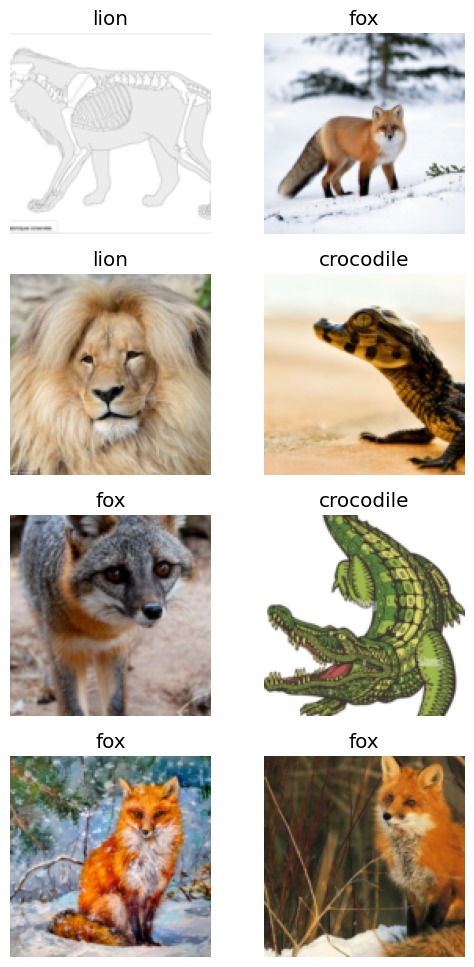

In [ ]:
dan.valid.show_batch(max_n=8,nrows=4)

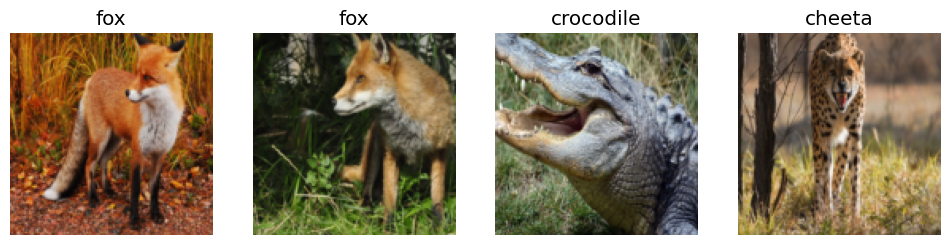

In [ ]:
box=box.new(item_tfms=RandomResizedCrop(128,min_scale=0.3))
dan=box.dataloaders(path)
dan.valid.show_batch(max_n=4, nrows=1)

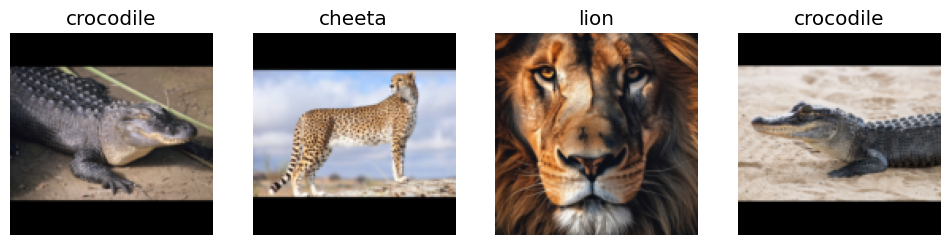

In [ ]:
box= box.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dan = box.dataloaders(path)
dan.valid.show_batch(max_n=4, nrows=1)

In [ ]:
box = box.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dan =box.dataloaders(path)
dan.train.show_batch(max_n=4, nrows=1, unique=True)

In [ ]:
box = box.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dan =box.dataloaders(path)
dan.train.show_batch(max_n=8, nrows=2, unique=True)

In [ ]:
box = box.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dan = box.dataloaders(path)

In [ ]:
learn = vision_learner(dan, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 142MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,2.196198,0.777089,0.296117,02:10


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time
0,0.987101,0.561652,0.189320,02:46
1,0.749718,0.524936,0.208738,02:24
2,0.571149,0.519128,0.184466,02:22
3,0.452527,0.514237,0.189320,02:21


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in by

In [ ]:
import requests
from fastai.vision.all import *

def predict_from_url(url, learn):
    response = requests.get(url)
    if response.status_code == 200:
        with open('temp_image.jpg', 'wb') as f:
            f.write(response.content)

        img = PILImage.create('temp_image.jpg')
        pred_class, pred_idx, outputs = learn.predict(img)
        print(f"Predicted class: {pred_class}")
        print(f"Prediction index: {pred_idx}")
        print(f"Class probabilities: {outputs}")
    else:
        print("Failed to retrieve the image. Please check the URL.")


url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTB44Gat2z3yKqh_Vx4vNp2t5oT5_g87qIc8g&s'
predict_from_url(url, learn)

Predicted class: tiger
Prediction index: 5
Class probabilities: tensor([1.7241e-04, 8.3206e-03, 2.7796e-05, 5.0369e-04, 9.0250e-05, 9.9089e-01])


In [ ]:
url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT5cT1PholaaUeQA1WFMowPvd0pXTmESl4hQg&s'
predict_from_url(url, learn)

Predicted class: tiger
Prediction index: 5
Class probabilities: tensor([0.0589, 0.0033, 0.0330, 0.0019, 0.3588, 0.5441])
